In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv("/content/drive/My Drive/FatimaQurban_ML&DL_BytewiseFellowship2024/FatimaQurban_ML&DL_BWF_Task3/nobel.csv")
print(df.shape)
df.head()

(1000, 18)


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


Most common gender who won nobel prize: Male


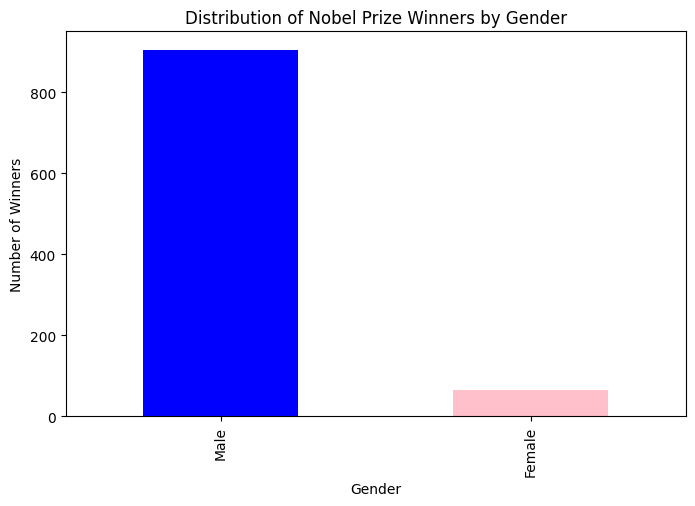

In [5]:
common_gender=df['sex']
top_gender=common_gender.mode()[0]
print("Most common gender who won nobel prize:", top_gender)
gender_counts = df['sex'].value_counts()

plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['blue', 'pink'])

plt.title('Distribution of Nobel Prize Winners by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Winners')
plt.show()


Most common country who won nobel prize: United States of America


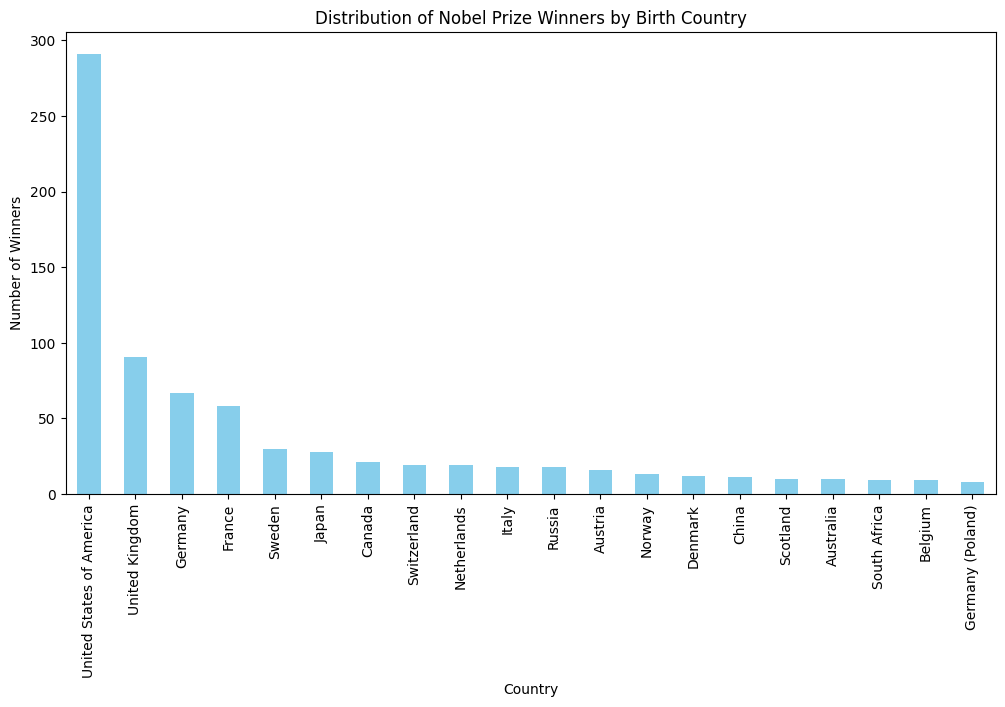

In [6]:
common_country=df['birth_country']
top_country=common_country.mode()[0]
print("Most common country who won nobel prize:", top_country)

# Calculate the count of each country
country_counts = df['birth_country'].value_counts()
top_countries = country_counts.head(20)

# Create the bar chart
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Distribution of Nobel Prize Winners by Birth Country')
plt.xlabel('Country')
plt.ylabel('Number of Winners')


# Show the plot
plt.show()

decade             2000
usa_born_winner     123
Name: 10, dtype: int64


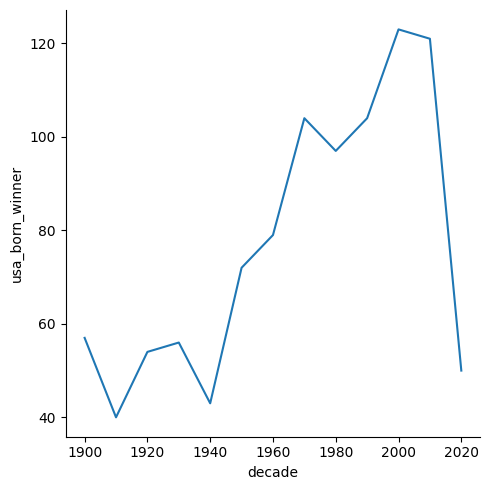

In [23]:
# US_nobelprize=df[df['birth_country']=='United States of America']
# US_nobelprize_year= US_nobelprize['year']
# max_decade_usa=US_nobelprize_year.mode()[0] # we use mode()[0] when we have a series which is acessing a single column type of single col is 'series'
# print("Maximum nobel prize won by the USA was in year:", max_decade_usa)


# Calculate the max winners of USA born per decade
df['usa_born_winner'] = df['birth_country'] == 'United States of America'
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)
count_usa_winners = df.groupby('decade', as_index=False)['usa_born_winner'].count()
max_decade_usa = count_usa_winners.loc[count_usa_winners['usa_born_winner'].idxmax()]
print(max_decade_usa)

ax1 = sns.relplot(x='decade', y='usa_born_winner', data=count_usa_winners, kind="line")


In [36]:

# # Calculating the proportion of female laureates per decade
# df['female_winner'] = df['sex'] == 'Female'
# df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)

# prop_female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# # Find the decade and category with the highest proportion of female laureates
# max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]
# print(max_female_decade_category)

female_laurates=df[df['sex']=='Female']
# female_laurates.head()
comb_dec_cat_female_won = female_laurates[['decade', 'category']]
dec_cat_most_female_won = comb_dec_cat_female_won.mode().iloc[0] # we use mode().iloc[0] when we have dataframe that is acessing two column dt of 2 col is 'dataframe'
# print(dec_cat_most_female_won,)
# max_female_dict=decade_most_female_won.to_dict()

max_female_dict= {
    dec_cat_most_female_won["decade"]:dec_cat_most_female_won["category"]
}
print("The decade and category where most females won awards: ",max_female_dict)


The decade and category where most females won awards:  {2010: 'Peace'}


In [46]:
female_laurates=df[df['sex']=='Female']
female_year=female_laurates['year']
first_female_year=female_year.min()          #.loc[row, col]
first_woman_category = female_laurates.loc[female_laurates['year']==first_female_year,'category'].iloc[0]
first_female_name = female_laurates.loc[female_laurates['year'] == first_female_year, 'full_name'].iloc[0]
print("First Female won nobel prize in the year", first_female_name, "and category", first_woman_category)


First Female won nobel prize in the year Marie Curie, née Sklodowska and category Physics


In [38]:
prizes_per_person = df.groupby('full_name').size()

for laureate, count in prizes_per_person.items():
    if count > 1:
        print(laureate, "has won", count, "Nobel Prizes.")


Comité international de la Croix Rouge (International Committee of the Red Cross) has won 3 Nobel Prizes.
Frederick Sanger has won 2 Nobel Prizes.
John Bardeen has won 2 Nobel Prizes.
Linus Carl Pauling has won 2 Nobel Prizes.
Marie Curie, née Sklodowska has won 2 Nobel Prizes.
Office of the United Nations High Commissioner for Refugees (UNHCR) has won 2 Nobel Prizes.
